<a href="https://colab.research.google.com/github/mgabrielsr/Missoes-Pratica-Faculdade/blob/main/Miss%C3%A3o_Pr%C3%A1tica_N4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Entrada dos dados
dias = [1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
despesas = {
    'alimentação': [100, 0, 0, 150, 50, 50, 100, 0, 150],
    'transporte': [0, 0, 100, 300, 150, 0, 0, 100, 100],
    'vestuário': [0, 50, 50, 0, 100, 150, 0, 100, 300]
}


In [ ]:
class Despesas:
    def __init__(self, dias, valores):
        self.dias = dias
        self.valores = valores

    def get_dados(self):
        return self.dias, self.valores


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

class Graficos:
    def __init__(self, despesas):
        self.despesas = despesas

    def plotar_series_temporais(self):
        dias, valores = self.despesas.get_dados()
        plt.figure(figsize=(10, 5))

        for categoria, serie in valores.items():
            plt.plot(dias, serie, marker='o', linestyle='-', label=categoria.capitalize())

        plt.xlabel('Dias')
        plt.ylabel('Despesas em reais (R$)')
        plt.title('Gráfico de despesas')
        plt.legend()
        plt.grid(True)
        plt.show()

    def plotar_regressao_linear(self, categoria):
        dias, valores = self.despesas.get_dados()
        serie = np.array(valores[categoria])
        dias_array = np.array(dias).reshape(-1, 1)

        # Criando o modelo de regressão linear
        modelo = LinearRegression()
        modelo.fit(dias_array, serie)

        # Previsão dos valores
        previsao = modelo.predict(dias_array)

        # Plotando a série temporal e a regressão linear
        plt.figure(figsize=(10, 5))
        plt.plot(dias, serie, marker='o', linestyle='-', label=f'{categoria.capitalize()} - Original')
        plt.plot(dias, previsao, linestyle='--', label='Regressão Linear')

        plt.xlabel('Dias')
        plt.ylabel('Despesas')
        plt.title(f'Série Temporal de Despesas com Regressão Linear - {categoria.capitalize()}')
        plt.legend()
        plt.grid(True)
        plt.show()

        # Exibindo coeficientes da regressão linear para a categoria
        coeficiente_angular = modelo.coef_[0]
        coeficiente_linear = modelo.intercept_
        print(f'{categoria.capitalize()} - Coeficiente angular: {coeficiente_angular}')
        print(f'{categoria.capitalize()} - Coeficiente linear: {coeficiente_linear}')


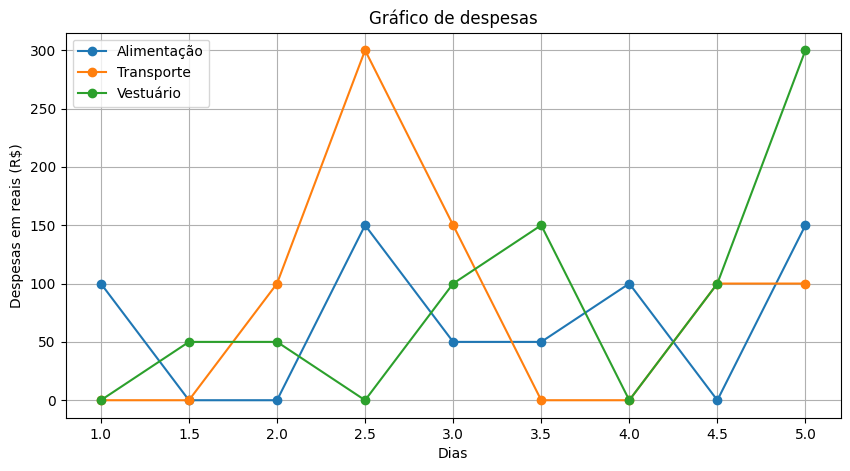

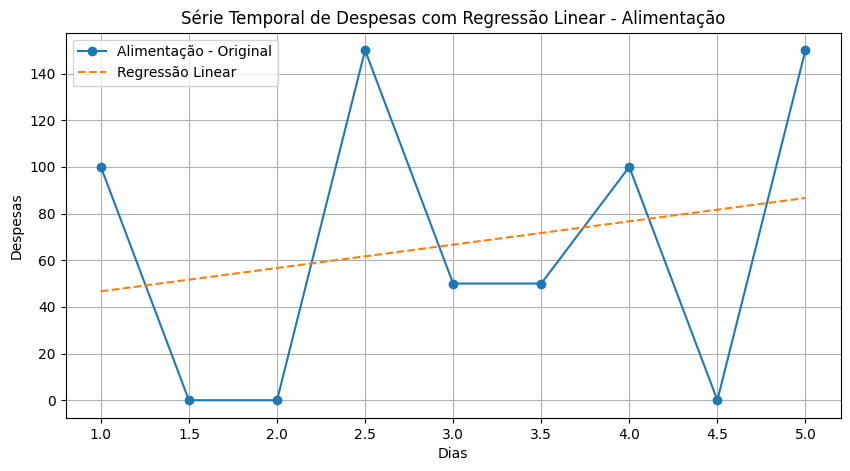

Alimentação - Coeficiente angular: 10.000000000000002
Alimentação - Coeficiente linear: 36.666666666666664


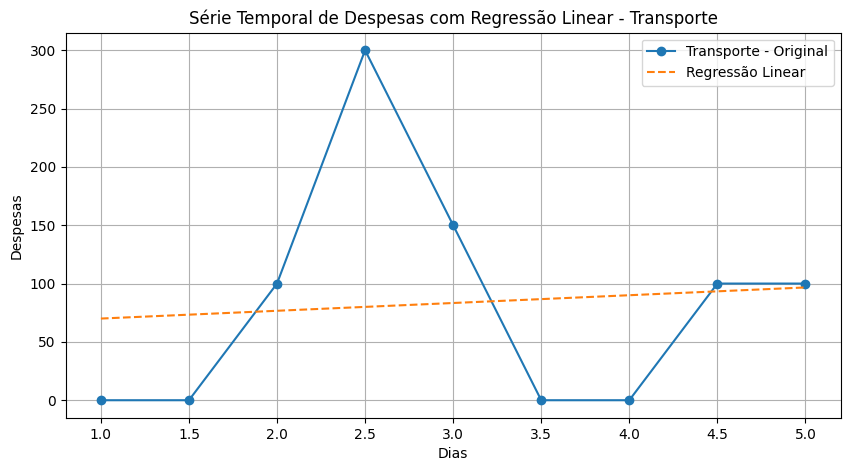

Transporte - Coeficiente angular: 6.66666666666667
Transporte - Coeficiente linear: 63.33333333333332


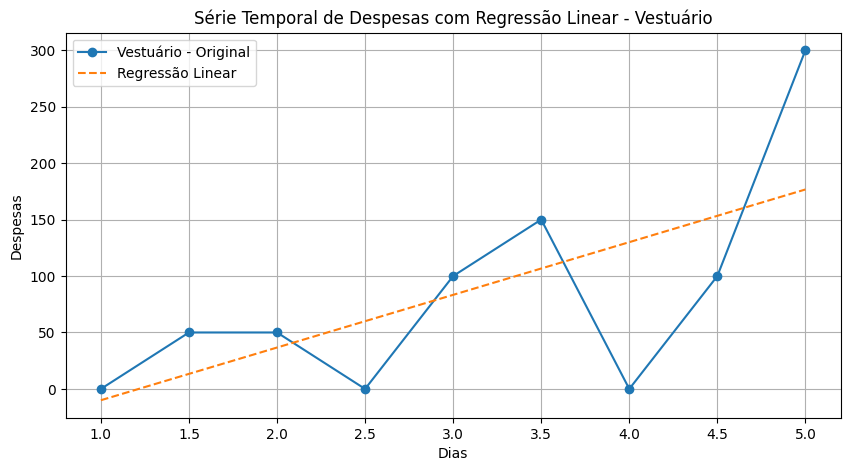

Vestuário - Coeficiente angular: 46.66666666666668
Vestuário - Coeficiente linear: -56.6666666666667


In [ ]:
# Instanciando a classe de despesas
despesas_obj = Despesas(dias, despesas)

# Instanciando a classe de gráficos e gerando os gráficos
graficos_obj = Graficos(despesas_obj)

# Plotando o gráfico de séries temporais
graficos_obj.plotar_series_temporais()

# Plotando os gráficos de regressão linear para cada categoria
categorias = ['alimentação', 'transporte', 'vestuário']
for categoria in categorias:
    graficos_obj.plotar_regressao_linear(categoria)
